In [11]:
import os
from task2vec import Task2Vec
from models import get_model
import datasets
import task_similarity
import pickle
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as color
from sklearn.manifold import TSNE
import random
import cv2
from PIL import Image

### pytorchデータセットの設定と作成

In [7]:
transform = transforms.Compose([
                                transforms.RandomResizedCrop(256, scale=(1,1), ratio=(1,1)),
                                transforms.CenterCrop(256),
                                transforms.ToTensor(), 
                                transforms.Normalize([0.485, 0.456, 0.406],
                                                     [0.229, 0.224, 0.225])
                                ])

train_data = ImageFolder(root='mydata', transform=transform)

### T-SNE出力(入力データ：pytorchデータセット)

t_sne shape: (1600, 2)


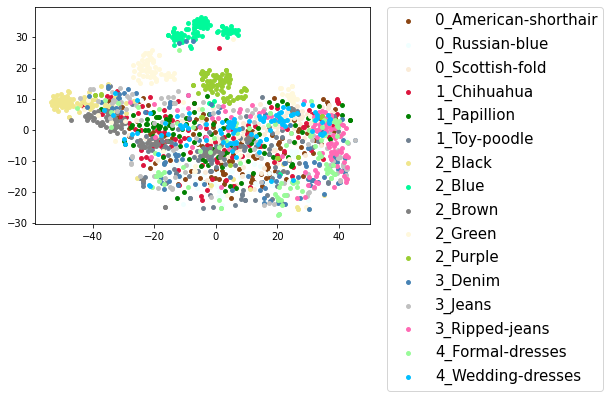

In [12]:
HEIGHT = 192
WIDTH = 192

def crop_center(pil_img, crop_width, crop_height):
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

def crop_max_square(pil_img):
    return crop_center(pil_img, min(pil_img.size), min(pil_img.size))


task_name = os.listdir('mydata')
name50 = []
img50 = []
targets = []

for i, name in enumerate(task_name):
    task_lst = os.listdir('mydata\\' + name)
    name50 = random.sample(task_lst, 100)
    for img_path in name50:
        img = Image.open('mydata\\' + name + '\\' + str(img_path))
        img = crop_max_square(img)
        img = img.resize((WIDTH, HEIGHT))
        img = img.convert('RGB')
        img = np.array(img)
        img = img.flatten()
        img = np.expand_dims(img, axis=0)
        img50.append(img)
        data = np.concatenate(img50, axis=0)
        targets.append(i)

t_sne = TSNE().fit_transform(data)
print('t_sne shape:', t_sne.shape)

color_palette = []
for rgb in color.CSS4_COLORS.values():
    color_palette.append(rgb)
color = random.sample(color_palette, len(task_name))

for i, data in enumerate(t_sne):
    plt.scatter(data[0], data[1], s=15, c=color[targets[i]], label=task_name[targets[i]] if i%100==0 else '')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=15)
plt.show()